In [18]:
import os, sys
from pprint import pprint
import matplotlib.pyplot as plt
plt.style.use('ggplot')

for module in ['actions', 'models']:
    path = os.path.join(os.getcwd(), '..', module)
    sys.path.append(os.path.abspath(path))

from oracle import oracle
from inference import plot
from lstm_fixed import train_fixed
from load_data import load_data, prune

In [19]:
train_trials, eval_trials, test_trials = load_data(train_folders='danny')

# accuracies of the best models for each input type
model_accuracies = []

In [20]:
def get_top_models(model_names, accuracies, parameters, top_n=10):
     # get indicies for top models
    top_indicies = sorted(range(len(accuracies)), key=lambda i: accuracies[i])[-top_n:]

    # get names for top models
    top_models = [model_names[i] for i in top_indicies]

    # get accuracies for top models
    top_accuracies = [accuracies[i] for i in top_indicies]

    # get params for top models
    top_parameters = [parameters[i] for i in top_indicies]

    tops = (list(zip(top_accuracies, top_parameters)))
    pprint(tops)

    return top_models[-1], top_accuracies[-1]

### Oracle

In [21]:
# Aaronson Oracle Accuracies for windows 4, 5, 6 for reference
window_sizes = [3, 4, 5, 6, 7]
oracle_results = oracle(window_sizes, test_trials, cutoff=True, logging=False)

window_size = 0
oracle_accuracy = 0

for w in window_sizes:
    if oracle_results[w]['accuracy'] > oracle_accuracy:
        window_size = w
        oracle_accuracy = oracle_results[w]['accuracy']

print(window_size, round(oracle_accuracy, 2))

6 58.25


### Binary

In [5]:
train_trials_binary = prune(train_trials, 'binary')
eval_trials_binary = prune(eval_trials, 'binary')
test_trials_binary = prune(test_trials, 'binary')

In [22]:
models = []
parameters = []
accuracies = []

for _ in range(30):
    model_name, params, accuracy = train_fixed(
        train_trials_binary, eval_trials_binary, test_trials_binary, 
        input_size=1, random='binary', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_binary_model, top_binary_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_binary_acc)

[(60.973489865213914,
  {'batch_size': 149,
   'hidden_size': 30,
   'input_size': 1,
   'learning_rate': 0.0063,
   'num_epochs': 3,
   'num_stacked_layers': 3,
   'segment_length': 8}),
 (61.10806758315786,
  {'batch_size': 69,
   'hidden_size': 52,
   'input_size': 1,
   'learning_rate': 0.0253,
   'num_epochs': 2,
   'num_stacked_layers': 3,
   'segment_length': 9}),
 (61.29159748999637,
  {'batch_size': 87,
   'hidden_size': 55,
   'input_size': 1,
   'learning_rate': 0.0215,
   'num_epochs': 3,
   'num_stacked_layers': 1,
   'segment_length': 5}),
 (61.571596861714056,
  {'batch_size': 92,
   'hidden_size': 74,
   'input_size': 1,
   'learning_rate': 0.029,
   'num_epochs': 3,
   'num_stacked_layers': 1,
   'segment_length': 10}),
 (61.79825490760631,
  {'batch_size': 54,
   'hidden_size': 67,
   'input_size': 1,
   'learning_rate': 0.0047,
   'num_epochs': 3,
   'num_stacked_layers': 1,
   'segment_length': 8}),
 (62.28499595779658,
  {'batch_size': 145,
   'hidden_size': 32,
  

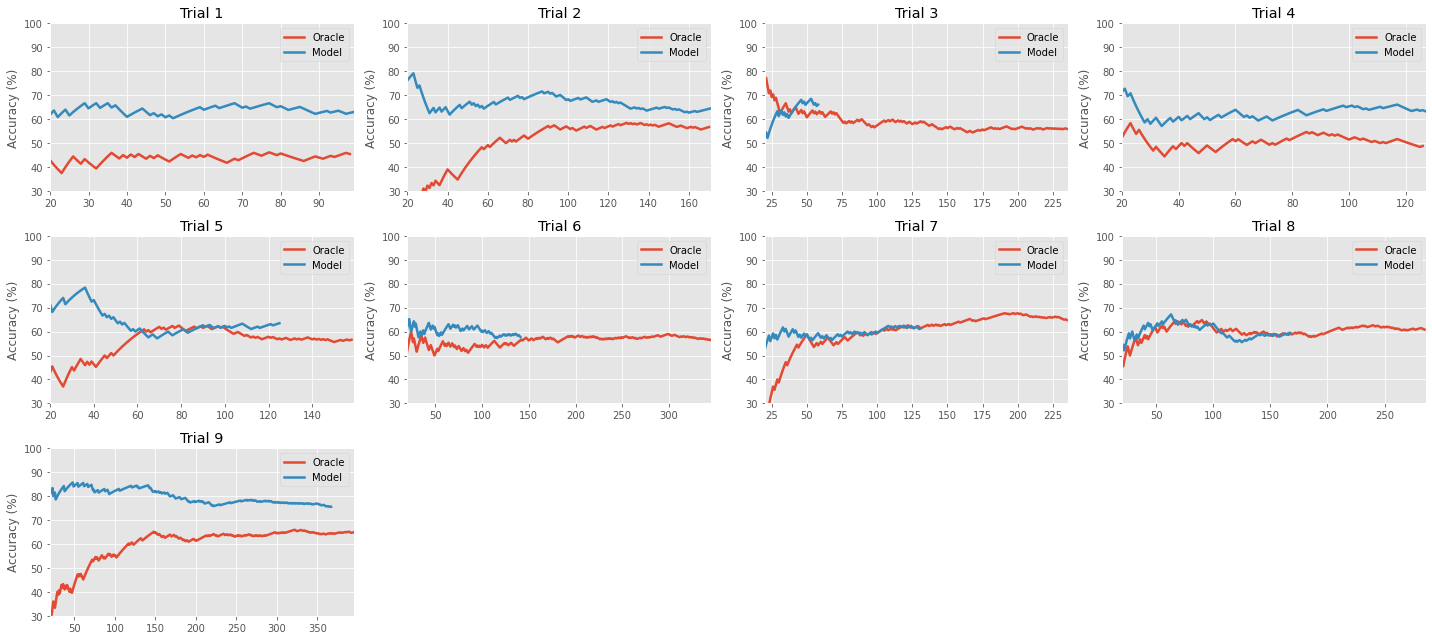

In [23]:
plot(test_trials, test_trials_binary, window_size, top_binary_model, cutoff=True)

### Delay

In [24]:
train_trials_delay = prune(train_trials, 'delay')
eval_trials_delay = prune(eval_trials, 'delay')
test_trials_delay = prune(test_trials, 'delay')

In [25]:
models = []
parameters = []
accuracies = []

for _ in range(30):
    model_name, params, accuracy = train_fixed(
        train_trials_delay, eval_trials_delay, test_trials_delay, 
        input_size=2, random='delay', logging=False,
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_delay_model, top_delay_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_delay_acc)

[(64.19549216324765,
  {'batch_size': 96,
   'hidden_size': 70,
   'input_size': 2,
   'learning_rate': 0.0116,
   'num_epochs': 5,
   'num_stacked_layers': 1,
   'segment_length': 8}),
 (64.23208185375626,
  {'batch_size': 110,
   'hidden_size': 60,
   'input_size': 2,
   'learning_rate': 0.024,
   'num_epochs': 5,
   'num_stacked_layers': 1,
   'segment_length': 10}),
 (64.36233020679668,
  {'batch_size': 109,
   'hidden_size': 53,
   'input_size': 2,
   'learning_rate': 0.0064,
   'num_epochs': 6,
   'num_stacked_layers': 2,
   'segment_length': 10}),
 (64.4123047227276,
  {'batch_size': 121,
   'hidden_size': 68,
   'input_size': 2,
   'learning_rate': 0.0313,
   'num_epochs': 6,
   'num_stacked_layers': 1,
   'segment_length': 9}),
 (64.45055629730153,
  {'batch_size': 95,
   'hidden_size': 46,
   'input_size': 2,
   'learning_rate': 0.0123,
   'num_epochs': 7,
   'num_stacked_layers': 1,
   'segment_length': 11}),
 (64.53103719881075,
  {'batch_size': 92,
   'hidden_size': 45,
  

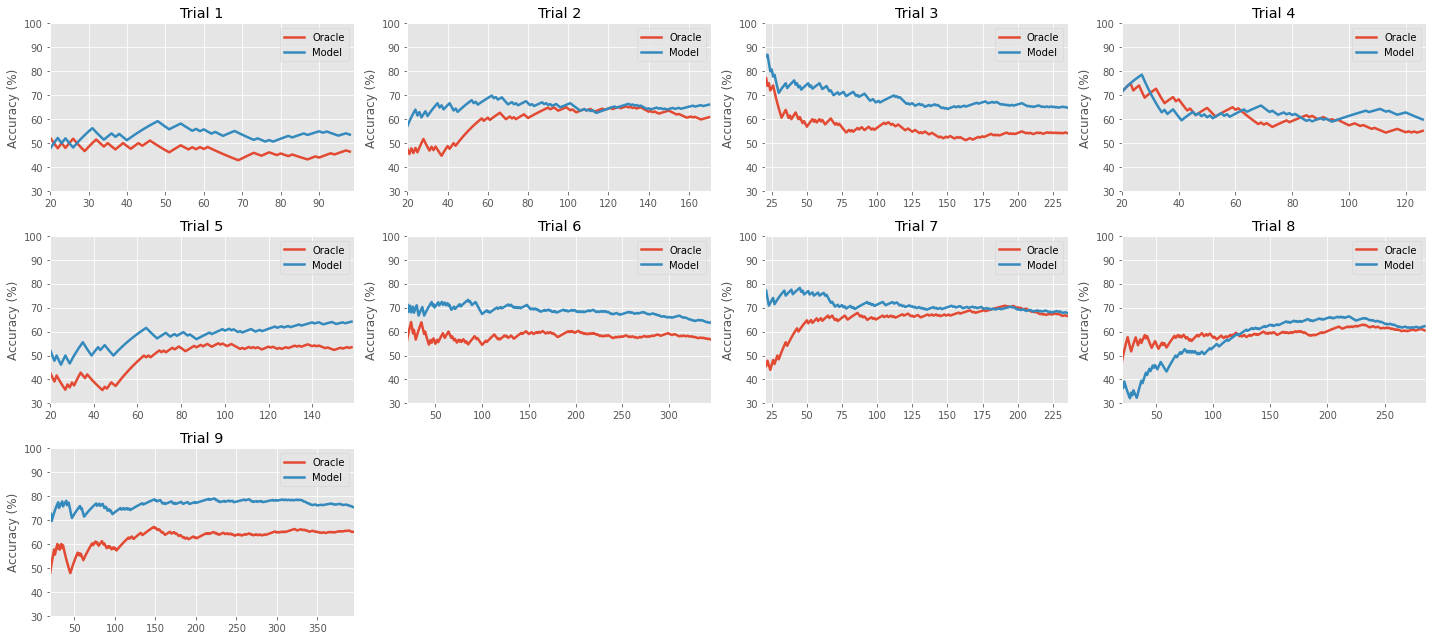

In [26]:
plot(test_trials, test_trials_delay, window_size, top_delay_model, cutoff=True)

### Pupils

In [27]:
train_trials_pupil = prune(train_trials, 'pupil')
eval_trials_pupil = prune(eval_trials, 'pupil')
test_trials_pupil = prune(test_trials, 'pupil')

In [28]:
models = []
parameters = []
accuracies = []

for _ in range(30):
    model_name, params, accuracy = train_fixed(
        train_trials_pupil, eval_trials_pupil, test_trials_pupil, 
        input_size=2, random='pupil', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_pupil_model, top_pupil_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_pupil_acc)

[(62.45417720797635,
  {'batch_size': 114,
   'hidden_size': 64,
   'input_size': 2,
   'learning_rate': 0.0197,
   'num_epochs': 7,
   'num_stacked_layers': 2,
   'segment_length': 12}),
 (62.45670563031857,
  {'batch_size': 122,
   'hidden_size': 47,
   'input_size': 2,
   'learning_rate': 0.0213,
   'num_epochs': 6,
   'num_stacked_layers': 4,
   'segment_length': 9}),
 (62.756381824673475,
  {'batch_size': 123,
   'hidden_size': 46,
   'input_size': 2,
   'learning_rate': 0.0191,
   'num_epochs': 6,
   'num_stacked_layers': 3,
   'segment_length': 10}),
 (62.835709031611636,
  {'batch_size': 104,
   'hidden_size': 46,
   'input_size': 2,
   'learning_rate': 0.0043,
   'num_epochs': 7,
   'num_stacked_layers': 2,
   'segment_length': 13}),
 (63.10127690170071,
  {'batch_size': 136,
   'hidden_size': 45,
   'input_size': 2,
   'learning_rate': 0.0084,
   'num_epochs': 6,
   'num_stacked_layers': 2,
   'segment_length': 10}),
 (63.25729401680251,
  {'batch_size': 127,
   'hidden_size'

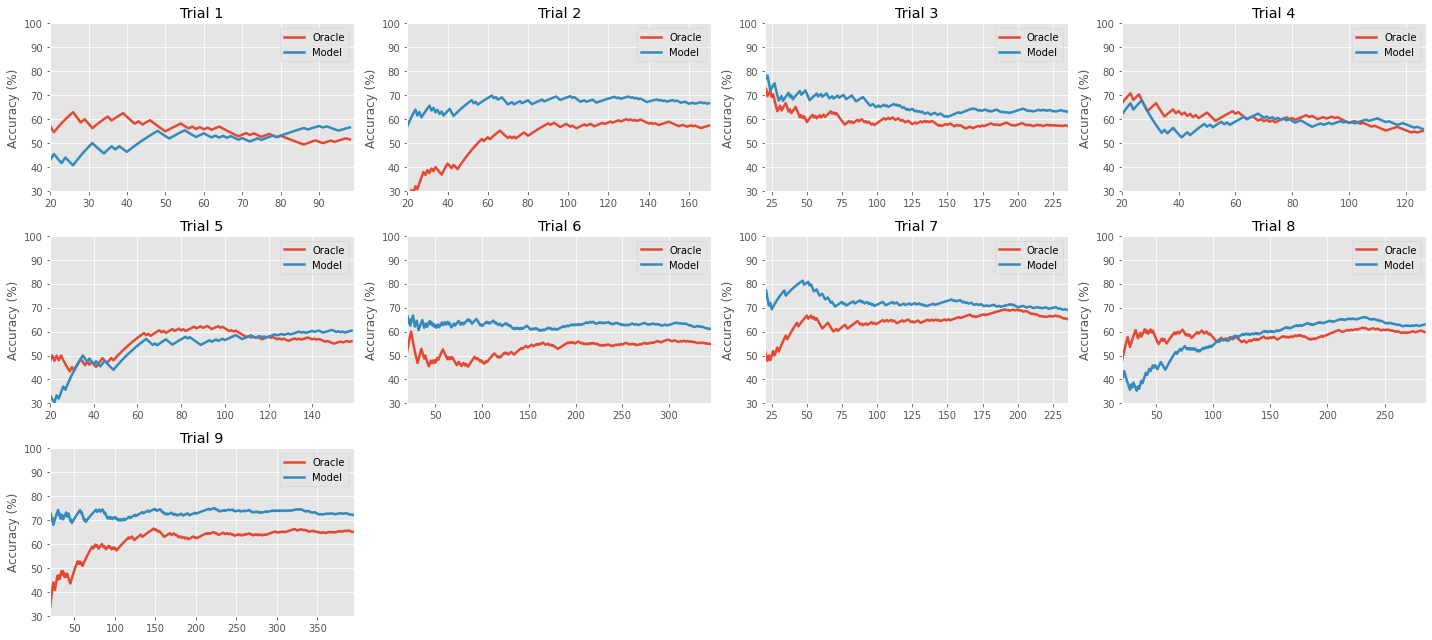

In [29]:
plot(test_trials, test_trials_pupil, window_size, top_pupil_model, cutoff=True)

### Delay + Pupil

In [30]:
models = []
parameters = []
accuracies = []

for _ in range(30):
    model_name, params, accuracy = train_fixed(
        train_trials, eval_trials, test_trials, 
        input_size=3, random='all', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_all_model, top_all_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_all_acc)

[(62.86558112643817,
  {'batch_size': 128,
   'hidden_size': 59,
   'input_size': 3,
   'learning_rate': 0.0176,
   'num_epochs': 7,
   'num_stacked_layers': 4,
   'segment_length': 9}),
 (63.11967281627965,
  {'batch_size': 139,
   'hidden_size': 47,
   'input_size': 3,
   'learning_rate': 0.0045,
   'num_epochs': 6,
   'num_stacked_layers': 3,
   'segment_length': 9}),
 (63.131284253221764,
  {'batch_size': 111,
   'hidden_size': 62,
   'input_size': 3,
   'learning_rate': 0.0153,
   'num_epochs': 7,
   'num_stacked_layers': 3,
   'segment_length': 11}),
 (63.27796762124183,
  {'batch_size': 100,
   'hidden_size': 63,
   'input_size': 3,
   'learning_rate': 0.0133,
   'num_epochs': 6,
   'num_stacked_layers': 4,
   'segment_length': 11}),
 (63.31888132546414,
  {'batch_size': 121,
   'hidden_size': 49,
   'input_size': 3,
   'learning_rate': 0.0061,
   'num_epochs': 7,
   'num_stacked_layers': 2,
   'segment_length': 13}),
 (63.3920446486438,
  {'batch_size': 139,
   'hidden_size': 5

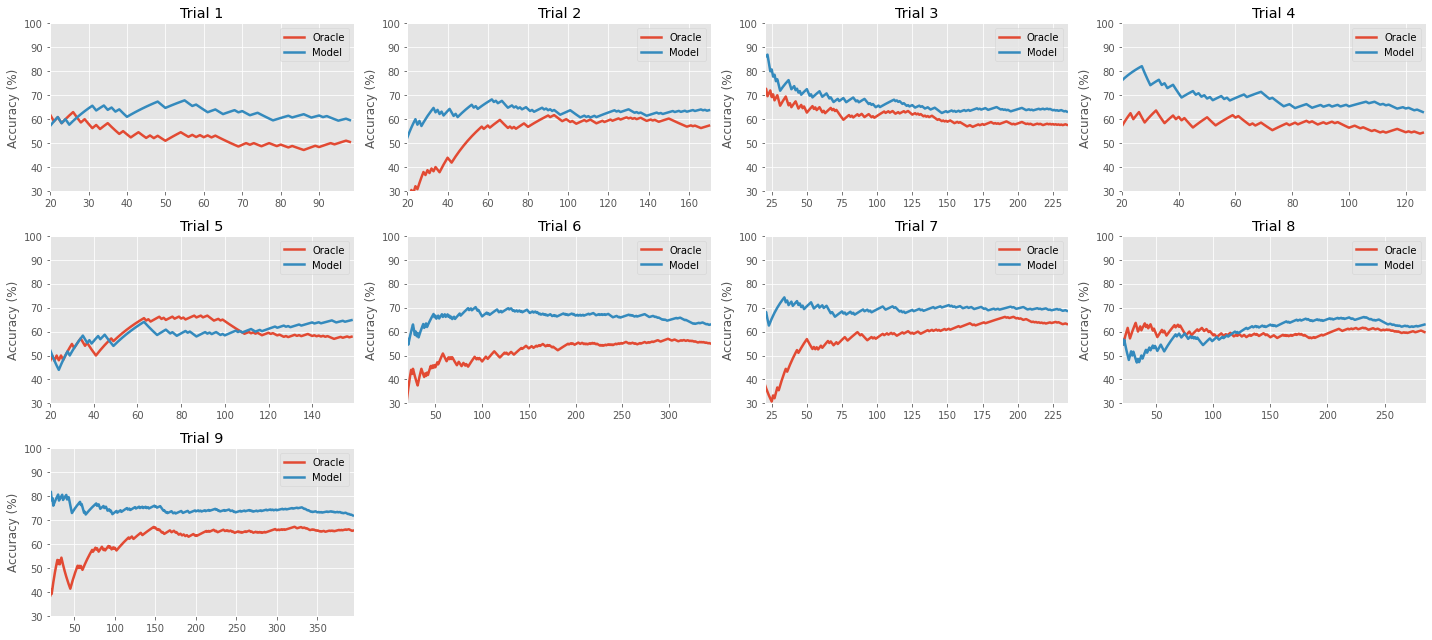

In [31]:
plot(test_trials, test_trials, window_size, top_all_model, cutoff=True)

### Plotting

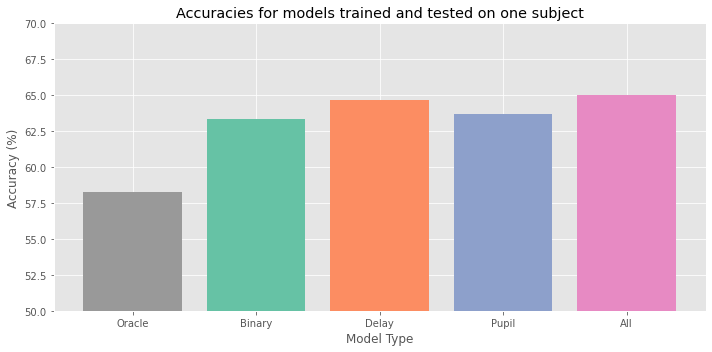

In [32]:
# use oracle accuracy and model accuracies to plot one bar chart of the results

plt.figure(figsize=(10, 5))
colors = ['#999999', '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
plt.bar(['Oracle', 'Binary', 'Delay', 'Pupil', 'All'], [oracle_accuracy, *model_accuracies], color=colors)
plt.title('Accuracies for models trained and tested on one subject')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model Type')
plt.ylim(50, 70)
plt.tight_layout()
plt.savefig('plots/fixed_o2o.png')
plt.show()
